<a href="https://colab.research.google.com/github/samirgadkari/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [52]:
from functools import reduce
import operator
import math

def mean(xs):
  if len(xs) == 0:
    raise(ValueError, 'Cannot find mean of empty list')
  return (reduce(operator.add, xs) / len(xs))

def var(xs):
  mean_xs = mean(xs)
  var_xs = 0.0
  for x in xs:
    var_xs += math.pow(x - mean_xs, 2)
  return var_xs / (len(xs) - 1)

def std_dev(xs):
  return math.sqrt(var(xs))

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print('Mean:', mean(sales))
print('Var:', var(sales))
print('Std dev:', std_dev(sales))

Mean: 3052.714285714286
Var: 214387.90476190473
Std dev: 463.0204150595357


In [53]:
# Checking my work
mean_xs = mean(sales)
v = (3505 - mean_xs) * (3505 - mean_xs) + (2400 - mean_xs) * (2400 - mean_xs) + \
    (3027 - mean_xs) * (3027 - mean_xs) + (2798 - mean_xs) * (2798 - mean_xs) + \
    (3700 - mean_xs) * (3700 - mean_xs) + (3250 - mean_xs) * (3250 - mean_xs) + \
    (2689 - mean_xs) * (2689 - mean_xs)
print(v / 7)
print(v / 6)

183761.06122448976
214387.90476190473


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [94]:
import pandas as pd
import numpy as np

customers = [127, 80, 105, 92, 120, 115, 93]
covariance = np.cov(customers, sales, rowvar = False)
print('Covariance between customers and sales:\n',
      covariance)

Covariance between customers and sales:
 [[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [97]:
std_sales = std_dev(sales)
std_customers = std_dev(customers)

# Each covariance value has to be divided by the correct
# std dev values, so do this manually.
corr = np.array([[covariance[0][0] / (std_customers * std_customers),
                 covariance[0][1] / (std_customers * std_sales)],
                 [covariance[1][0] / (std_customers * std_sales),
                 covariance[1][1] / (std_sales * std_sales)]])
print('Found corr:\n', corr)

df = pd.DataFrame({'customers': customers, 'sales': sales})
print('Library corrcoef:\n', np.corrcoef(customers, sales, rowvar = False))

Found corr:
 [[1.         0.96283398]
 [0.96283398 1.        ]]
Library corrcoef:
 [[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
new_df = df.select_dtypes(include = [np.number])
new_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

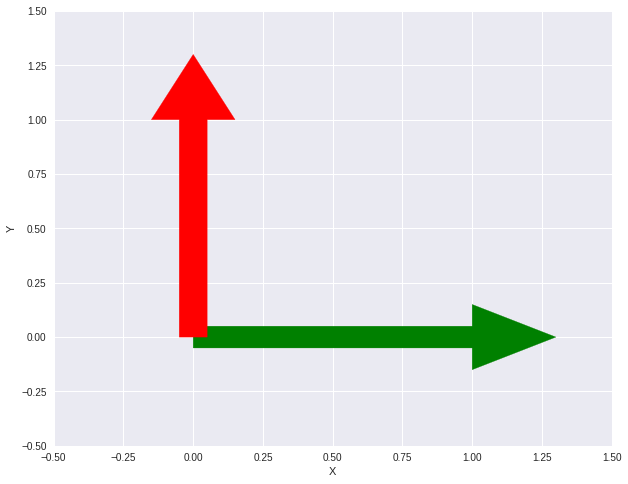

'Synomym for orthogonal is perpendicular'

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 8))
ax = fig.gca()
ax.arrow(0, 0, 1, 0, color = 'green', head_length = 0.3, width = 0.1)
ax.arrow(0, 0, 0, 1, color = 'red', head_length = 0.3, width = 0.1)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

'''Synomym for orthogonal is perpendicular'''

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [71]:
a = [-5, 3, 7]
b = [6, -8, 2]
print('Since the dot product of the vectors is:', np.dot(a, b),
      '. It is non-zero.\nSo the vectors are not orthogonal')

Since the dot product of the vectors is: -40 . It is non-zero.
So the vectors are not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [72]:
c = [2, -15, 6, 20]
norm_c = 0
for ci in c:
  norm_c += ci * ci
print('norm(c):', norm_c)
print('c dot c:', np.dot(c, c), 'is same as norm(c) and c_transpose c')
print('c transpose c:', np.matmul(np.transpose(c), c), 
      'is same as norm(c) and c dot c')

norm(c): 665
c dot c: 665 is same as norm(c) and c_transpose c
c transpose c: 665 is same as norm(c) and c dot c


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$
d = 7 
\left[
\begin{array}{ccc}
1 \\
0
\end{array}
\right]
+
12
\left[
\begin{array}{ccc}
0 \\
1
\end{array}
\right]
$

$
e = 
2
\left[
\begin{array}{ccc}
1 \\
0 \\
0
\end{array}
\right]
+
11
\left[
\begin{array}{ccc}
0 \\
1 \\
0
\end{array}
\right]
-8
\left[
\begin{array}{ccc}
0 \\
0 \\
1
\end{array}
\right]
$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [73]:
f = np.array([4, 12, 11, 9, 2])
print('Unit vector of f is:',
     f / np.linalg.norm(f))

Unit vector of f is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

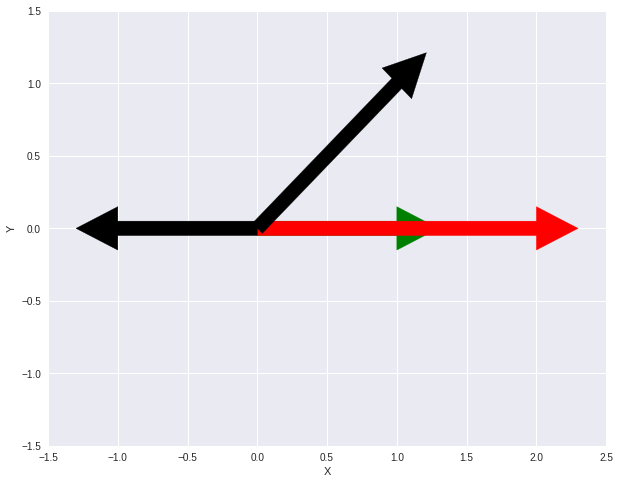

'The red/green vectors are dependent, the black vectors are independent.'

In [99]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

ax.arrow(0, 0, 1, 0, color = 'green', head_length = 0.3, width = 0.1)
ax.arrow(0, 0, 2, 0, color = 'red', head_length = 0.3, width = 0.1)
ax.arrow(0, 0, 1, 1, color = 'black', head_length = 0.3, width = 0.1)
ax.arrow(0, 0, -1, 0, color = 'black', head_length = 0.3, width = 0.1)
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

'''The red/green vectors are dependent, the black vectors are independent.'''

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [80]:
'''These vectors are dependent because 4 * g == h, so their span is a line.'''

'These vectors are dependent because 4 * g == h, so their span is a line.'

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [84]:
matrix = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
print('Since the determinant of matrix is nonzero:', np.linalg.det(matrix),
     ',\nthe span is the entire 3-D space R3')

Since the determinant of matrix is nonzero: -19.999999999999996 ,
the span is the entire 3-D space R3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



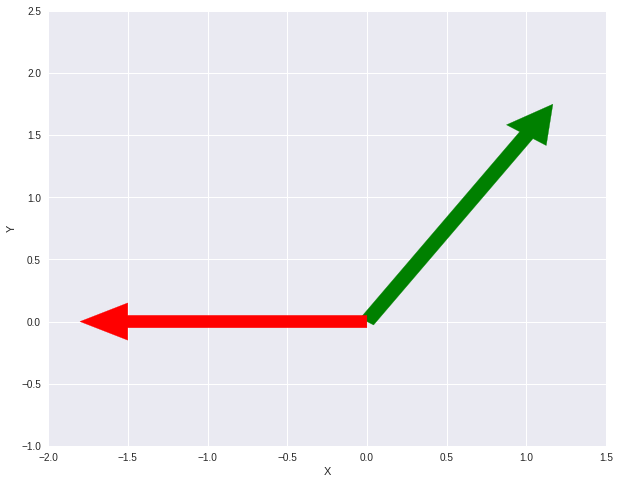

In [87]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

ax.arrow(0, 0, 1, 1.5, color = 'green', head_length = 0.3, width = 0.1)
ax.arrow(0, 0, -1.5, 0, color = 'red', head_length = 0.3, width = 0.1)
ax.set_xlim(-2, 1.5)
ax.set_ylim(-1, 2.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 6.2 What does it mean to form a basis?

Any vectors that are independent form a set of basis vectors.  Their linear combinations span all points in that space.

If they're also orthogonal to each other, they form orthogonal basis vectors.

If they're also of unit length, they're called orthonormal basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [89]:
from scipy.linalg import lu

p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
pl, u = lu(p, permute_l = True)
print(u)
'''Since the upper-triangular matrix is not missing any elements,
the rank of P is 3.'''

[[4.  8.  2. ]
 [0.  2.  7.5]
 [0.  0.  2.5]]


'Since the upper-triangular matrix is not missing any elements,\nthe rank of P is 3.'

## 7.2 What does the rank of a matrix tell us?

The Rank of a matrix tells us if the vectors in the matrix span a lower dimension. ex. a 3 x 3 matrix is expected to be of rank 3, but if we do Gaussian elimination, we may find one row/col is all 0's.  In this case, the matrix is of rank 2, and spans only a plane in 3-D space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

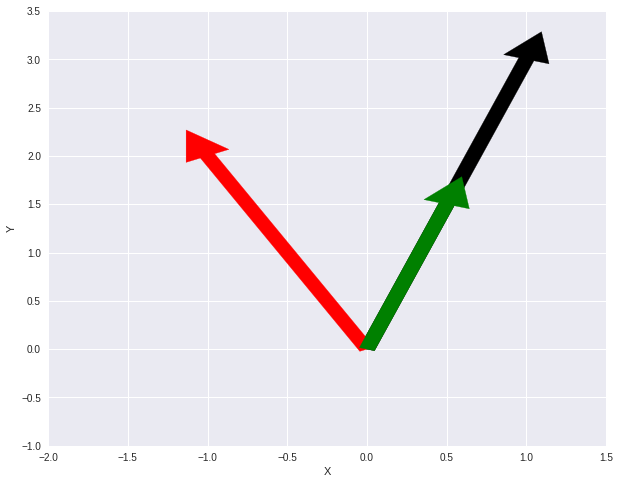

In [91]:
''' A dot product of the unit vector in the direction of v,
with the vector v will give us the projection of w onto L.
'''

v = np.array([1, 3])
w = np.array([-1, 2])
unit_v = v / np.linalg.norm(v)
projection = np.dot(w, unit_v) * unit_v

fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

ax.arrow(0, 0, v[0], v[1], color = 'black', 
         head_length = 0.3, width = 0.1)
ax.arrow(0, 0, w[0], w[1], color = 'red', 
         head_length = 0.3, width = 0.1)
ax.arrow(0, 0, projection[0], projection[1], color = 'green', 
         head_length = 0.3, width = 0.1)
ax.set_xlim(-2, 1.5)
ax.set_ylim(-1, 3.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

p:
 [array([2.5, 2.5]), array([3., 3.]), array([6., 6.]), array([1.5, 1.5]), array([8.5, 8.5]), array([3., 3.]), array([6.5, 6.5])]
xs:
 (2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999)
ys:
 (2.4999999999999996, 2.9999999999999996, 5.999999999999999, 1.4999999999999998, 8.499999999999998, 2.9999999999999996, 6.499999999999999)


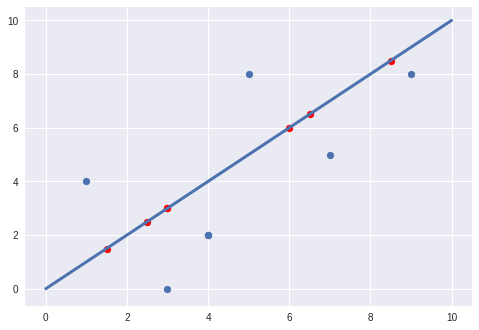

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def projections(xs, ys):
  a = np.array([1, 1]) # vector along y = x line
  unit_a = a / np.linalg.norm(a)
  projected = []
  for i in range(len(xs)):
    projected.append(
        np.dot(np.array([xs[i], ys[i]]), unit_a) * unit_a)
  
  return projected

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

# Draw the line y = x
xs = ys = np.linspace(0, 10, 1000)
plt.plot(xs, ys, linewidth = 3)

# Plot each projected point on the line
p = projections(df.x, df.y)
print('p:\n', p)
xs, ys = zip(*p)
print('xs:\n', xs)
print('ys:\n', ys)
plt.scatter(xs, ys, color = 'red')

plt.scatter(df.x, df.y)
plt.show()